<a href="https://colab.research.google.com/github/ancestor9/2026_Spring_Modeling-and-Simulation/blob/main/%EC%84%B8%ED%8F%AC%EA%B0%90%EC%97%BC_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Module 1: 모델링의 기본 개념 및 정상 세포 증식

In [8]:
# 1. 모델 함수 정의 (dX/dt = X/24)
def cell_growth(t, X):
    # 세포 분열 상수 (1/24 h)
    return X / 24

# Module 2: 지수적 성장 (Exponential Growth)

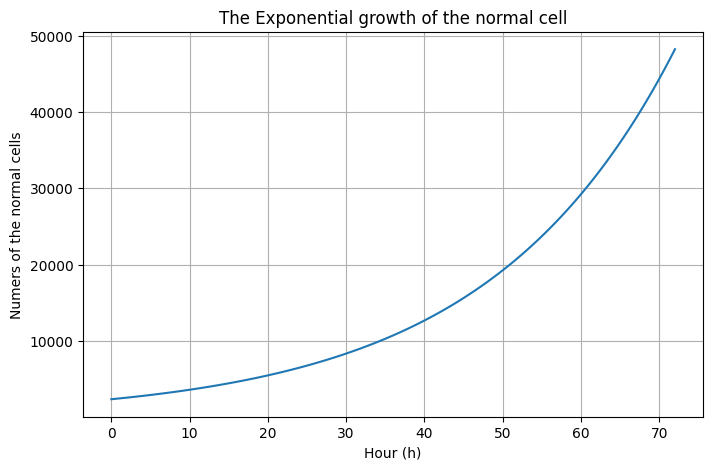


초기 세포수 (X(0)): 2400


72시간 후 예측 세포 수 (이론값): 48205.29


In [9]:

# 2. 초기 조건 설정
X0 = 2400  # 초기 세포 수 (예시)
t_span =  (0, 72) # 시뮬레이션 시간 (0시간부터 72시간까지) - 튜플로 수정
t_points = np.linspace(t_span[0], t_span[1], 100) # 그래프 출력을 위한 시간 간격

# 3. 미분방정식 풀이 (수치적 적분)
solution = solve_ivp(cell_growth, t_span, [X0], t_eval=t_points)

# 4. 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(solution.t, solution.y[0], label='Cell Count X(t)') # solution.y가 2D 배열이므로 첫 번째 행 선택
plt.xlabel('Hour (h)')
plt.ylabel('Numers of the normal cells')
plt.title('The Exponential growth of the normal cell')
plt.grid(True)
plt.show()

# 5. 72시간 후 예측값 확인 (이론적 예측: X(0) * e^3)
X_72_predicted = X0 * (np.exp(1)**(72/24))
print(f"\n초기 세포수 (X(0)): {X0}")
print(f"\n\n72시간 후 예측 세포 수 (이론값): {X_72_predicted:.2f}")

# Module 3: 복잡한 상호작용 모델 (감염 모델)
- 현실의 생명 시스템은 복잡하며, 정상 세포(X)가 감염 세포(Y)와 상호작용하며 감소하는 경우를 가정해 수리 모델링을 확장

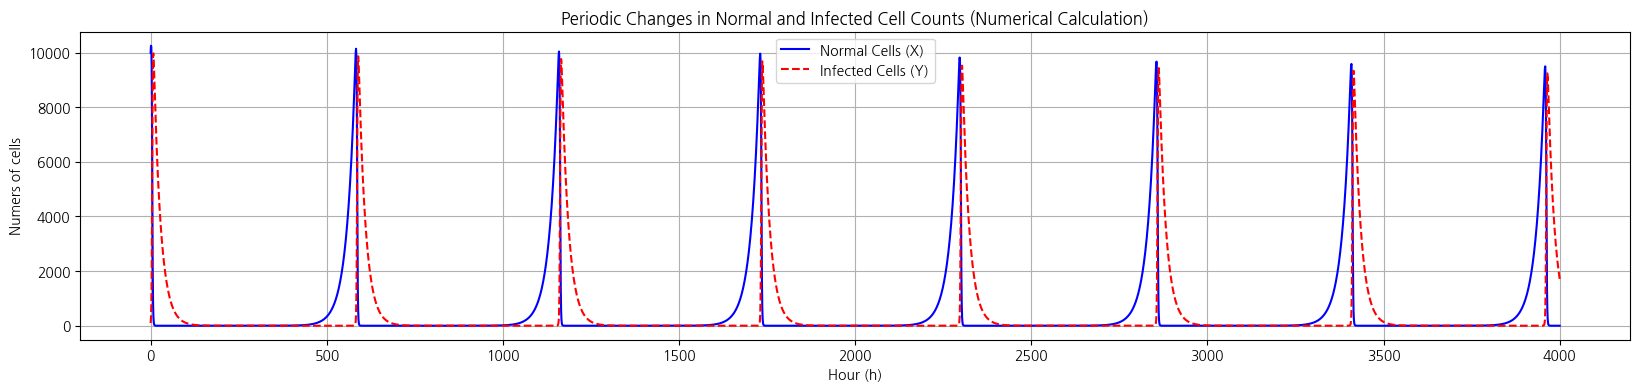

In [24]:
# 1. 모델 함수 정의 (dX/dt, dY/dt 시스템)
def interaction_model(t, Z):
    # Z = X (정상 세포), Z[1] = Y (감염 세포)
    X, Y = Z

    # 모델 상수 설정
    A = 1/24 # 정상 세포 증식율 (1/24 h)
    k = 0.0001 # 감염 속도 상수 (k값이 클수록 감염 속도 빠름)
    d = 0.05  # 감염 세포 사멸 속도 상수

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y

    return [dXdt, dYdt]

# 2. 초기 조건 설정
Z0 = [10000, 100] # 초기 [X0, Y0] (정상 세포 10000, 감염 세포 100)
end_t_span = 4000 # 시뮬레이션 마지막 시간
t_span = (0, end_t_span) # 시뮬레이션 시간 (0시간부터 400시간까지) - 튜플로 수정
t_points = np.linspace(0, t_span[1], end_t_span)

# 3. 미분방정식 풀이
solution = solve_ivp(interaction_model, t_span, Z0, t_eval=t_points)

# 4. 결과 시각화
plt.figure(figsize=(20, 4))
plt.plot(solution.t, solution.y[0], label='Normal Cells (X)', color='blue')
plt.plot(solution.t, solution.y[1], label='Infected Cells (Y)', color='red', linestyle='--')
plt.xlabel('Hour (h)')
plt.ylabel('Numers of cells')
plt.title('Periodic Changes in Normal and Infected Cell Counts (Numerical Calculation)')
plt.legend()
plt.grid(True)
plt.show()

### 동적 예측 (Oscillation)
- 컴퓨터로 수치 계산을 하면 정상 세포 수(X)와 감염 세포 수(Y)가 단순히 증가하거나 감소하는 것이 아니라, 오르락내리락하는 주기적인 패턴(직관적 예상과 다르다)

>    ◦ X가 감소하면 kXY가 작아져 Y의 증가 속도가 줄어들고, 결국 Y가 감소

>    ◦ Y가 감소하면 kXY가 작아져 X의 감소 속도가 줄어들고, X가 다시 증가하게 되면서 순환이 반복

- 현실 적용: 이와 같은 주기적인 증감 현상은 전염병 사태(예: COVID-19 확진자 수의 파동)와 같은 사회 현상을 예측하는 데 사용